In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
# train and test split
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:3],df.iloc[:,3],test_size=0.2)

## Using Sklearn

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
from sklearn.compose import ColumnTransformer
X_train.shape

(712, 3)

In [8]:
CT=ColumnTransformer([
    ('trf1',SimpleImputer(),[0]),
    ('trf2',SimpleImputer(strategy='median'),[1])
    
],remainder='passthrough')

In [9]:
X_train_transformed=CT.fit_transform(X_train)

In [10]:
#X_test_transformed.isna().sum()
import numpy as np
np.count_nonzero(np.isnan(X_train_transformed))

0

In [11]:
CT.transformers_[0][1].statistics_

array([29.65414336])

In [12]:
new_df = pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [13]:
new_df.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

## Using the PANDAS

In [14]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [15]:
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)
X_train['Fare_Median']=X_train['Fare'].fillna(median_fare)

In [16]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_Median
301,NaN,23.2500,2,29.654143,28.0,23.2500,23.2500
214,NaN,7.7500,1,29.654143,28.0,7.7500,7.7500
405,34.0,21.0000,1,34.000000,34.0,21.0000,21.0000
717,27.0,10.5000,0,27.000000,27.0,10.5000,10.5000
4,35.0,8.0500,0,35.000000,35.0,8.0500,8.0500
551,27.0,26.0000,0,27.000000,27.0,26.0000,26.0000
716,38.0,227.5250,0,38.000000,38.0,227.5250,227.5250
835,39.0,83.1583,2,39.000000,39.0,83.1583,83.1583
652,21.0,8.4333,0,21.000000,21.0,8.4333,8.4333
694,60.0,26.5500,0,60.000000,60.0,26.5500,26.5500


In [17]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_Median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  215.57962500918515
Age Variance after median imputation:  173.56358709346753
Age Variance after mean imputation:  173.13075369935956
Original Fare variable variance:  2782.9412602450634
Fare Variance after median imputation:  2650.7385959520825
Fare Variance after mean imputation:  2634.204596547014


<AxesSubplot:ylabel='Density'>

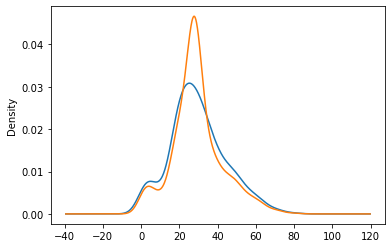

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure()


X_train['Age'].plot(kind='kde')
X_train['Age_median'].plot(kind='kde')

<Figure size 432x288 with 0 Axes>

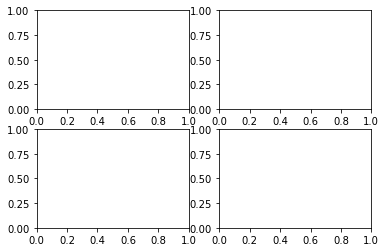

In [70]:

fig = plt.figure()  # an empty figure with no axes
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [71]:
ax_lst

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

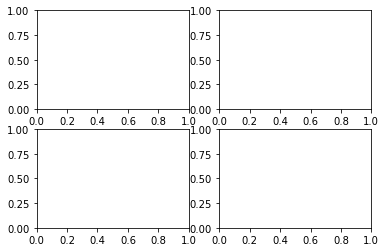

In [72]:
fig

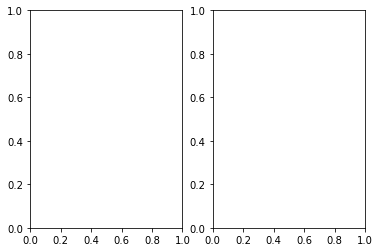

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2)

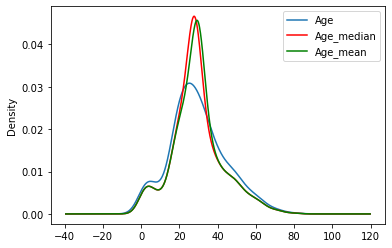

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

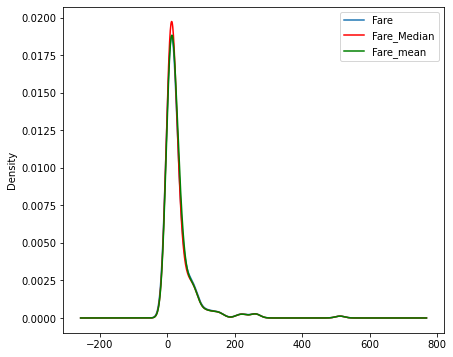

In [27]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(121)
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_Median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [28]:
# need to check for covariance and correlation
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_Median
Age,1.000000,0.082031,-0.308384,1.000000,1.000000,0.079961,0.079129
Fare,0.082031,1.000000,0.223349,0.078773,0.084033,1.000000,1.000000
Family,-0.308384,0.223349,1.000000,-0.255720,-0.251796,0.220437,0.220149
Age_mean,1.000000,0.078773,-0.255720,1.000000,0.998752,0.076868,0.076130
Age_median,1.000000,0.084033,-0.251796,0.998752,1.000000,0.082000,0.081031
Fare_mean,0.079961,1.000000,0.220437,0.076868,0.082000,1.000000,0.996876
Fare_Median,0.079129,1.000000,0.220149,0.076130,0.081031,0.996876,1.000000


In [29]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_Median
Age,215.579625,68.800693,-6.959225,215.579625,215.579625,64.638401,64.218622
Fare,68.800693,2782.941260,19.853628,54.841793,58.576229,2782.941260,2782.941260
Family,-6.959225,19.853628,2.759002,-5.588913,-5.510034,18.792534,18.826745
Age_mean,215.579625,54.841793,-5.588913,173.130754,173.130754,51.910727,51.573605
Age_median,215.579625,58.576229,-5.510034,173.130754,173.563587,55.445573,54.962430
Fare_mean,64.638401,2782.941260,18.792534,51.910727,55.445573,2634.204597,2634.204597
Fare_Median,64.218622,2782.941260,18.826745,51.573605,54.962430,2634.204597,2650.738596


<AxesSubplot:>

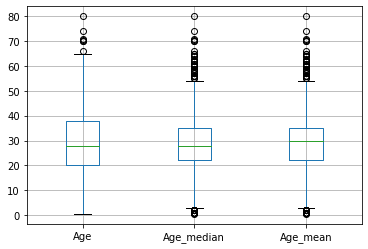

In [30]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot() #outlers are increased so we need to use other imputation

<AxesSubplot:>

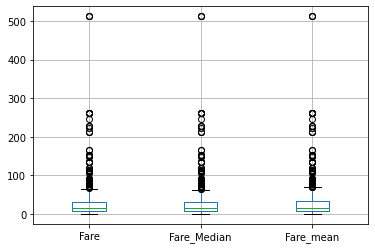

In [32]:
X_train[['Fare','Fare_Median','Fare_mean']].boxplot() #no change in the outlers